In [27]:
import torch
import torch.nn as nn
import torchvision
from skimage import io, transform
import matplotlib.pyplot as plt
from torchvision import transforms
from skimage.transform import resize

In [2]:
class SqueezeNet(nn.Module):
    def __init__(self, num_classes):
        super(SqueezeNet, self).__init__()
        self.pretrain_net = torchvision.models.squeezenet1_1(pretrained=True)
        self.base_net = self.pretrain_net.features
        self.pooling = nn.AvgPool2d(3)
        self.fc = nn.Linear(51200, num_classes)

    def forward(self, x):
        x = self.base_net(x)
        x = self.pooling(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [3]:
model = SqueezeNet(42)
model.load_state_dict(torch.load("key_net.pth"))
model.eval()

SqueezeNet(
  (pretrain_net): SqueezeNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace=True)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace=True)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace=True)
      )
      (4): Fire(
        (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace=True)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace=True)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       

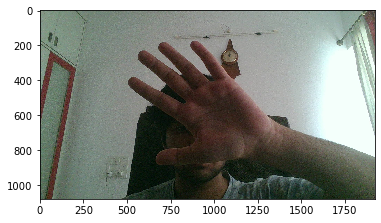

In [4]:
img_path = "test_img.jpg"
image = io.imread(img_path)
plt.imshow(image)

In [5]:
class Rescale(object):

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, image):

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))


        return img
    

In [6]:
image_transforms = transforms.Compose([Rescale((512,512)), 
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), 
                                       ])

In [7]:
image_t = image_transforms(image)
image_s = image_t.unsqueeze(0)

In [8]:
lands = model(image_s.float())
lands = torch.reshape(lands, shape=(21,2))
lands


tensor([[277.0312, 292.0147],
        [269.8520, 275.5713],
        [260.6447, 268.7119],
        [268.1557, 271.1462],
        [253.4210, 260.7077],
        [298.5788, 257.6023],
        [297.0522, 255.0656],
        [284.4591, 256.7530],
        [250.9464, 245.1117],
        [310.7169, 269.0365],
        [300.8090, 270.2740],
        [280.2599, 283.3101],
        [245.6471, 282.9918],
        [317.3279, 280.1485],
        [320.9678, 275.8335],
        [304.1910, 280.5603],
        [271.9866, 268.3716],
        [320.2285, 292.8594],
        [331.0472, 294.0367],
        [325.1447, 296.4167],
        [301.0309, 275.1678]], grad_fn=<ViewBackward>)

In [35]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    print(image.shape)
    n_img = resize(image,(512,512))
    plt.imshow(n_img)
    plt.scatter(landmarks[:, 0].detach().numpy(), landmarks[:, 1].detach().numpy(), s=10, marker='.', c='r')
    plt.pause(0.001)

(1080, 1920, 3)


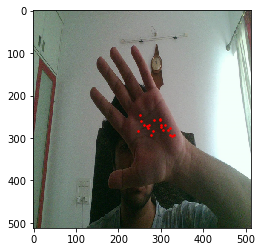

In [36]:
show_landmarks(image, landmarks=lands)